In [32]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
from google.colab import files
uploaded = files.upload()

Saving input.txt to input.txt


In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU,Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import string
import pandas as pd

In [8]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
! pip install tf_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 5.0 MB/s 
     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 1.7 MB 52.7 MB/s 
     |████████████████████████████████| 438 kB 74.8 MB/s 
     |████████████████████████████████| 5.9 MB 49.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.1

In [75]:
from transformers import BertTokenizer
from tf_transformers.models import BertModel

In [76]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [77]:
## Text Pre processing ##

Text Pre processing

In [78]:
def clean_text(txt):
    txt = "".join(w for w in txt if w not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii","ignore")
    return txt

In [79]:
tokenizer = Tokenizer()
data = open('/content/gdrive/MyDrive/input.txt','r',encoding='utf-8').read()
corpus = data.lower().split("\n")
corpus=[clean_text(x) for x in corpus]
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [80]:
tokenizer.word_index

{'you': 1,
 'your': 2,
 'and': 3,
 'team': 4,
 'best': 5,
 'ey': 6,
 'on': 7,
 'the': 8,
 'regards': 9,
 'hr': 10,
 'congratulations': 11,
 'of': 12,
 'award': 13,
 'to': 14,
 'we': 15,
 'winning': 16,
 'this': 17,
 'i': 18,
 'it': 19,
 'for': 20,
 'hard': 21,
 'work': 22,
 'have': 23,
 'happy': 24,
 'birthday': 25,
 'all': 26,
 'wishes': 27,
 'is': 28,
 'day': 29,
 'celebrate': 30,
 'promotion': 31,
 'in': 32,
 'achieve': 33,
 'with': 34,
 'incredible': 35,
 'do': 36,
 'so': 37,
 'an': 38,
 'amazing': 39,
 'are': 40,
 'a': 41,
 'our': 42,
 'hope': 43,
 'come': 44,
 'true': 45,
 'special': 46,
 'get': 47,
 'out': 48,
 'there': 49,
 'wishing': 50,
 'biggest': 51,
 'slice': 52,
 'today': 53,
 'new': 54,
 'post': 55,
 'deserved': 56,
 'spot': 57,
 'stands': 58,
 'alone': 59,
 'proudly': 60,
 'witnessing': 61,
 'dedication': 62,
 'makes': 63,
 'shining': 64,
 'midst': 65,
 'names': 66,
 'fame': 67,
 'keep': 68,
 'going': 69,
 'life': 70,
 'dreams': 71,
 'congratulation': 72,
 'achievement'

In [81]:
corpus

['happy birthday hope all your birthday wishes come true it is your special day  get out there and celebrate wishing you the biggest slice of happy today best regards ey hr team ',
 'congratulations on promotion best wishes for your new post you deserved the promotion  best regards ey hr team',
 'congratulations on the spot award winning this award stands alone proudly witnessing your hard work and dedication this award makes you shining in midst of names and fame keep going in your life and achieve your all dreams with your hard work congratulation for your achievement  best regards ey hr team',
 'congratulations on best team award winning congratulations on your incredible success i always knew you could do it and i am incredibly proud of you  best regards ey hr team',
 'congratulations on quarterly award winning i saw you work so hard every day to achieve this accomplishment and i can not think of anyone who deserves it more you set an amazing example for everyone at the company  be

In [82]:
for line in corpus:
    print(line)
    print("___________________________________")

happy birthday hope all your birthday wishes come true it is your special day  get out there and celebrate wishing you the biggest slice of happy today best regards ey hr team 
___________________________________
congratulations on promotion best wishes for your new post you deserved the promotion  best regards ey hr team
___________________________________
congratulations on the spot award winning this award stands alone proudly witnessing your hard work and dedication this award makes you shining in midst of names and fame keep going in your life and achieve your all dreams with your hard work congratulation for your achievement  best regards ey hr team
___________________________________
congratulations on best team award winning congratulations on your incredible success i always knew you could do it and i am incredibly proud of you  best regards ey hr team
___________________________________
congratulations on quarterly award winning i saw you work so hard every day to achieve thi

In [83]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [84]:
input_sequences

[[24, 25],
 [24, 25, 43],
 [24, 25, 43, 26],
 [24, 25, 43, 26, 2],
 [24, 25, 43, 26, 2, 25],
 [24, 25, 43, 26, 2, 25, 27],
 [24, 25, 43, 26, 2, 25, 27, 44],
 [24, 25, 43, 26, 2, 25, 27, 44, 45],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29, 47],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29, 47, 48],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29, 47, 48, 49],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29, 47, 48, 49, 3],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29, 47, 48, 49, 3, 30],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29, 47, 48, 49, 3, 30, 50],
 [24,
  25,
  43,
  26,
  2,
  25,
  27,
  44,
  45,
  19,
  28,
  2,
  46,
  29,
  47,
  48,
  49,
  3,
  30,
  50,
  1],
 [24,
  25,


In [85]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [86]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [87]:
len(label)

260

Bidirectional LSTM

In [88]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
#model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 63, 100)           12600     
                                                                 
 bidirectional_2 (Bidirectio  (None, 63, 300)          301200    
 nal)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 100)               160400    
                                                                 
 dense_6 (Dense)             (None, 63)                6363      
                                                                 
 dense_7 (Dense)             (None, 126)               8064      
                                                                 
Total params: 488,627
Trainable params: 488,627
Non-trainable params: 0
________________________________________________

In [89]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
9/9 [==============================] - 4s 21ms/step - loss: 5.5749 - accuracy: 0.0192
Epoch 2/100
9/9 [==============================] - 0s 15ms/step - loss: 5.4036 - accuracy: 0.0346
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 5.2275 - accuracy: 0.0346
Epoch 4/100
9/9 [==============================] - 0s 15ms/step - loss: 5.1100 - accuracy: 0.0385
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 5.0025 - accuracy: 0.0462
Epoch 6/100
9/9 [==============================] - 0s 14ms/step - loss: 4.8997 - accuracy: 0.0269
Epoch 7/100
9/9 [==============================] - 0s 15ms/step - loss: 4.7872 - accuracy: 0.0500
Epoch 8/100
9/9 [==============================] - 0s 15ms/step - loss: 4.6433 - accuracy: 0.0692
Epoch 9/100
9/9 [==============================] - 0s 15ms/step - loss: 4.5497 - accuracy: 0.0731
Epoch 10/100
9/9 [==============================] - 0s 16ms/step - loss: 4.4613 - accuracy: 0.0808
Epoch 11/100
9/9 [=

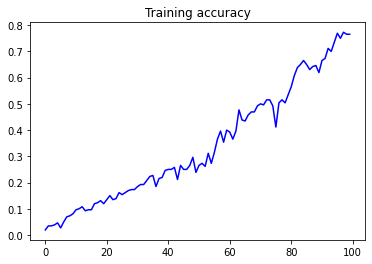

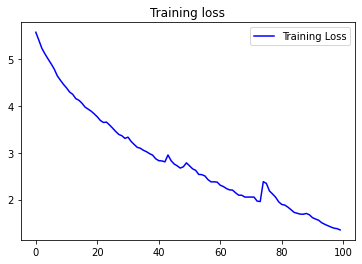

In [90]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [91]:
seed_text = "Happy Birthday Nilanjan!"
next_words = 30

In [92]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 24ms/step
Happy Birthday Nilanjan! all your wishes come true true work hard day you get out there and celebrate celebrate the of celebrate the of happy today best regards ey hr team team team


In [93]:
seed_text = "Congratulations on promotion!"
next_words = 30

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    #print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 43ms/step
Congratulations on promotion! best ey we are thrilled to have you with us we had a lot of applicants and we chose you because we believe believe that skills experience and creativity will


LSTM

In [94]:
model = Sequential()
model.add(Embedding(total_words,200,input_length=max_sequence_len-1))
model.add(LSTM(200,return_sequences=True))
model.add(LSTM(200))
model.add(Dense(total_words,activation='relu'))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 63, 200)           25200     
                                                                 
 lstm_6 (LSTM)               (None, 63, 200)           320800    
                                                                 
 lstm_7 (LSTM)               (None, 200)               320800    
                                                                 
 dense_8 (Dense)             (None, 126)               25326     
                                                                 
 dense_9 (Dense)             (None, 126)               16002     
                                                                 
Total params: 708,128
Trainable params: 708,128
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
9/9 [==============================] - 3s 18ms/step - loss: 4.8225 - accuracy: 0.0346
Epoch 2/100
9/9 [==============================] - 0s 17ms/step - loss: 4.6749 - accuracy: 0.0423
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 4.5716 - accuracy: 0.0346
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 4.5112 - accuracy: 0.0385
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 4.4340 - accuracy: 0.0615
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 4.3353 - accuracy: 0.0500
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 4.2708 - accuracy: 0.0769
Epoch 8/100
9/9 [==============================] - 0s 11ms/step - loss: 4.1553 - accuracy: 0.0769
Epoch 9/100
9/9 [==============================] - 0s 11ms/step - loss: 4.0669 - accuracy: 0.0846
Epoch 10/100
9/9 [==============================] - 0s 12ms/step - loss: 3.9450 - accuracy: 0.1000
Epoch 11/100
9/9 [=

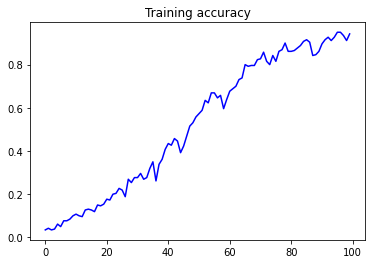

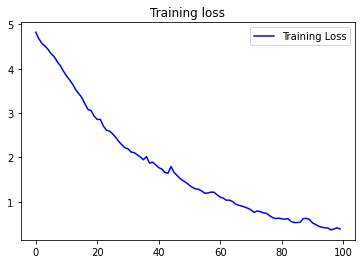

In [96]:
## Plot the accuracy and loss ##
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [97]:
seed_text = "Happy Birthday Nilanjan!"
next_words = 30

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 31ms/step
Happy Birthday Nilanjan! hope all your birthday wishes come true it is your your day get out and and celebrate you the biggest slice of happy today best regards ey hr team team


In [98]:
seed_text = "Congratulations on promotion!"
next_words = 30

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    #print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 30ms/step
Congratulations on promotion! best wishes for your new you you the the promotion best regards ey hr team team team on team on hope all your your alone hard hard work and and


GRU

In [99]:
import tensorflow as tf

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 200,
                             input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dense(total_words, activation='relu'),
    tf.keras.layers.Dense(total_words, activation='softmax'),
    ##model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 63, 200)           25200     
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              253440    
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 126)               32382     
                                                                 
 dense_13 (Dense)            (None, 126)               16002     
                                                                 
Total params: 327,024
Trainable params: 327,024
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
9/9 [==============================] - 4s 14ms/step - loss: 4.8245 - accuracy: 0.0192
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 4.7319 - accuracy: 0.0538
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 4.5584 - accuracy: 0.0731
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 4.4603 - accuracy: 0.0769
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 4.3438 - accuracy: 0.1308
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 4.1914 - accuracy: 0.1308
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 3.9751 - accuracy: 0.1308
Epoch 8/100
9/9 [==============================] - 0s 10ms/step - loss: 3.8722 - accuracy: 0.1769
Epoch 9/100
9/9 [==============================] - 0s 9ms/step - loss: 3.7074 - accuracy: 0.1962
Epoch 10/100
9/9 [==============================] - 0s 9ms/step - loss: 3.5456 - accuracy: 0.2308
Epoch 11/100
9/9 [=====

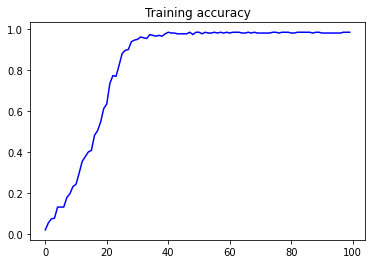

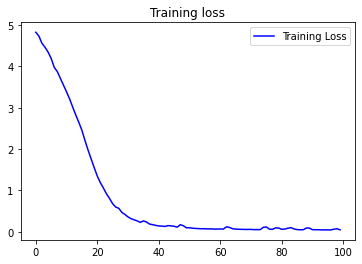

In [106]:
## Plot the accuracy and loss ##
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [107]:
seed_text = " Happy Birthday Nilanjan."
next_words = 30

In [108]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list),axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 20ms/step
 Happy Birthday Nilanjan. hope all your birthday wishes come true it is your special day get out there and celebrate wishing you the biggest slice of happy today best regards ey hr team


In [109]:
seed_text = "Congratulations for your promotion"
next_words = 30

In [110]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list),axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 24ms/step
Congratulations for your promotion best wishes for your new post you deserved the promotion best regards ey hr team award winning congratulations on your incredible success i always knew you could do it and
